In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [20]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [21]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [22]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

farmington us
narsaq gl
qui nhon vn
buchanan lr
prince george ca
grand forks us
sola vu
avarua ck
camacha pt
ushuaia ar
san carlos de bariloche ar
port alfred za
rikitea pf
fort nelson ca
airai pw
punta arenas cl
leshukonskoye ru
esso ru
puerto madryn ar
xining cn
cherskiy ru
barrow us
oxford us
kavaratti in
atuona pf
cidreira br
beloha mg
walvis bay na
busselton au
rikitea pf
camacha pt
hermanus za
new norfolk au
clyde river ca
tarko-sale ru
umzimvubu za
praia da vitoria pt
castro cl
imperial us
chernyshevskiy ru
suici ro
kapaa us
atbasar kz
amderma ru
doctor pedro p. pena py
leningradskiy ru
olafsvik is
bilibino ru
sitka us
amderma ru
ushuaia ar
rikitea pf
barrow us
sulangan ph
thompson ca
pisco pe
thinadhoo mv
punta arenas cl
carnarvon au
upernavik gl
brae gb
sao filipe cv
albany au
dunedin nz
punta arenas cl
catabola ao
bredasdorp za
hofn is
tarudant ma
airai pw
savannah bight hn
bengkulu id
ostrovnoy ru
butaritari ki
yellowknife ca
ushuaia ar
otjimbingwe na
busselton au
thompson c

punta arenas cl
paradwip in
marevo ru
bilibino ru
dudinka ru
eyl so
sentyabrskiy ru
torbay ca
varzea da palma br
new norfolk au
mys shmidta ru
iqaluit ca
leningradskiy ru
albany au
jamestown sh
samarai pg
arraial do cabo br
albany au
jamestown sh
bambous virieux mu
datong cn
puerto ayora ec
vaini to
canico pt
klaksvik fo
rio grande br
rikitea pf
albany au
mataura pf
kodiak us
ribeira grande pt
bengkulu id
ambilobe mg
conceicao do araguaia br
madang pg
tumannyy ru
atuona pf
marstal dk
ballina au
upernavik gl
chuy uy
richards bay za
shibata jp
mamakan ru
eugene us
luderitz na
tuktoyaktuk ca
jamestown sh
aksha ru
bubaque gw
krasnoselkup ru
severo-kurilsk ru
keetmanshoop na
ushuaia ar
punta arenas cl
mataura pf
rikitea pf
illoqqortoormiut gl
atuona pf
arraial do cabo br
hambantota lk
acapulco mx
kavieng pg
clyde river ca
mangrol in
hobart au
vaini to
sherlovaya gora ru
atuona pf
prieska za
mataura pf
longyearbyen sj
ushuaia ar
souillac mu
east london za
plastun ru
hobart au
lunenburg ca
go

cape town za
atuona pf
burnie au
hobart au
yellowknife ca
illoqqortoormiut gl
cherskiy ru
vaini to
constitucion mx
blagoyevo ru


In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

615

In [24]:
#Import the requests library.
import requests

#Import the API key.
from config import weather_api_key


In [25]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [26]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [27]:
# Create an empty list to hold the weather data.

city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | farmington
Processing Record 2 of Set 1 | narsaq
Processing Record 3 of Set 1 | qui nhon
Processing Record 4 of Set 1 | buchanan
Processing Record 5 of Set 1 | prince george
Processing Record 6 of Set 1 | grand forks
Processing Record 7 of Set 1 | sola
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | camacha
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | san carlos de bariloche
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | fort nelson
Processing Record 15 of Set 1 | airai
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | leshukonskoye
Processing Record 18 of Set 1 | esso
Processing Record 19 of Set 1 | puerto madryn
Processing Record 20 of Set 1 | xining
Processing Record 21 of Set 1 | cherskiy
Processing Record 22 of Set 1 | barrow
Processing Record 23 of 

Processing Record 36 of Set 4 | warqla
City not found. Skipping...
Processing Record 37 of Set 4 | sawtell
Processing Record 38 of Set 4 | flinders
Processing Record 39 of Set 4 | leh
Processing Record 40 of Set 4 | boffa
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | bacuit
City not found. Skipping...
Processing Record 43 of Set 4 | vostok
Processing Record 44 of Set 4 | mogadishu
Processing Record 45 of Set 4 | wawa
Processing Record 46 of Set 4 | bonnyville
Processing Record 47 of Set 4 | shingu
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | conil
Processing Record 50 of Set 4 | cockburn town
Processing Record 1 of Set 5 | bowen
Processing Record 2 of Set 5 | siderno
Processing Record 3 of Set 5 | anderson
Processing Record 4 of Set 5 | sisimiut
Processing Record 5 of Set 5 | anadyr
Processing Record 6 of Set 5 | salihorsk
Processing Record 7 of Set 5 | rungata
City not found. Skipping...
Processing Record 8 of Set 5 | des 

Processing Record 28 of Set 8 | madang
Processing Record 29 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 8 | marstal
Processing Record 31 of Set 8 | richards bay
Processing Record 32 of Set 8 | shibata
Processing Record 33 of Set 8 | mamakan
Processing Record 34 of Set 8 | eugene
Processing Record 35 of Set 8 | aksha
Processing Record 36 of Set 8 | krasnoselkup
Processing Record 37 of Set 8 | keetmanshoop
Processing Record 38 of Set 8 | mangrol
Processing Record 39 of Set 8 | sherlovaya gora
Processing Record 40 of Set 8 | prieska
Processing Record 41 of Set 8 | souillac
Processing Record 42 of Set 8 | east london
Processing Record 43 of Set 8 | plastun
Processing Record 44 of Set 8 | lunenburg
Processing Record 45 of Set 8 | goderich
Processing Record 46 of Set 8 | itoman
Processing Record 47 of Set 8 | manicore
Processing Record 48 of Set 8 | poum
Processing Record 49 of Set 8 | fukue
Processing Record 50 of Set 8 | grindavik
Processing Record 1 of Set 

Processing Record 17 of Set 12 | impfondo
Processing Record 18 of Set 12 | poronaysk
Processing Record 19 of Set 12 | araouane
Processing Record 20 of Set 12 | killybegs
Processing Record 21 of Set 12 | mehran
Processing Record 22 of Set 12 | spruce grove
Processing Record 23 of Set 12 | otradnoye
Processing Record 24 of Set 12 | skalistyy
City not found. Skipping...
Processing Record 25 of Set 12 | kavali
Processing Record 26 of Set 12 | naivasha
Processing Record 27 of Set 12 | san luis
Processing Record 28 of Set 12 | aykhal
Processing Record 29 of Set 12 | ucluelet
Processing Record 30 of Set 12 | shenjiamen
Processing Record 31 of Set 12 | banepa
Processing Record 32 of Set 12 | quatre cocos
Processing Record 33 of Set 12 | priyutnoye
Processing Record 34 of Set 12 | adiake
Processing Record 35 of Set 12 | mahadday weyne
City not found. Skipping...
Processing Record 36 of Set 12 | atlantic city
Processing Record 37 of Set 12 | predivinsk
Processing Record 38 of Set 12 | bargal
Cit

In [31]:
len(city_data)

569

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Farmington,36.7281,-108.2187,66.88,19,0,1.01,US,2022-05-03 02:40:07
1,Narsaq,60.9167,-46.0500,39.42,91,99,3.94,GL,2022-05-03 02:40:08
2,Qui Nhon,13.7667,109.2333,80.47,72,100,18.57,VN,2022-05-03 02:40:09
3,Buchanan,5.8808,-10.0467,79.43,86,100,3.22,LR,2022-05-03 02:40:09
4,Prince George,53.9166,-122.7530,51.24,76,0,10.36,CA,2022-05-03 02:39:30
5,Grand Forks,47.9417,-97.4337,39.13,81,100,6.91,US,2022-05-03 02:40:10
6,Sola,-13.8833,167.5500,82.08,69,98,7.18,VU,2022-05-03 02:40:11
7,Avarua,-21.2078,-159.7750,82.45,83,75,14.97,CK,2022-05-03 02:40:11
8,Camacha,33.0833,-16.3333,60.22,82,75,13.80,PT,2022-05-03 02:40:12
9,Ushuaia,-54.8000,-68.3000,37.06,81,35,0.00,AR,2022-05-03 02:36:37


In [36]:
new_city_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Farmington,US,2022-05-03 02:40:07,36.7281,-108.2187,66.88,19,0,1.01
1,Narsaq,GL,2022-05-03 02:40:08,60.9167,-46.0500,39.42,91,99,3.94
2,Qui Nhon,VN,2022-05-03 02:40:09,13.7667,109.2333,80.47,72,100,18.57
3,Buchanan,LR,2022-05-03 02:40:09,5.8808,-10.0467,79.43,86,100,3.22
4,Prince George,CA,2022-05-03 02:39:30,53.9166,-122.7530,51.24,76,0,10.36
5,Grand Forks,US,2022-05-03 02:40:10,47.9417,-97.4337,39.13,81,100,6.91
6,Sola,VU,2022-05-03 02:40:11,-13.8833,167.5500,82.08,69,98,7.18
7,Avarua,CK,2022-05-03 02:40:11,-21.2078,-159.7750,82.45,83,75,14.97
8,Camacha,PT,2022-05-03 02:40:12,33.0833,-16.3333,60.22,82,75,13.80
9,Ushuaia,AR,2022-05-03 02:36:37,-54.8000,-68.3000,37.06,81,35,0.00


In [37]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [39]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

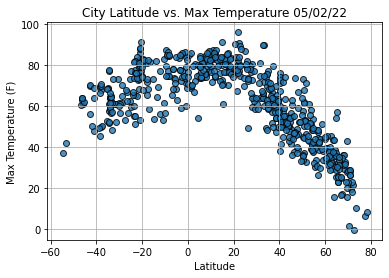

In [40]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

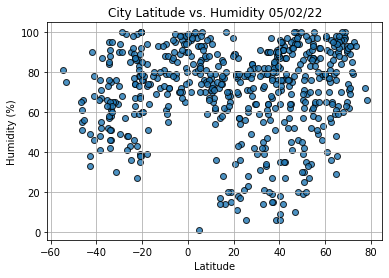

In [41]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

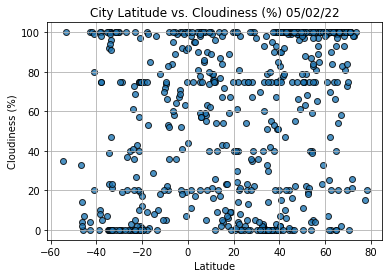

In [42]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

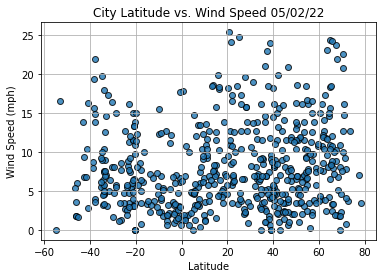

In [43]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()